원하는 관광지명을 쉼표로 구분하여 입력하세요:  압구정로데오거리


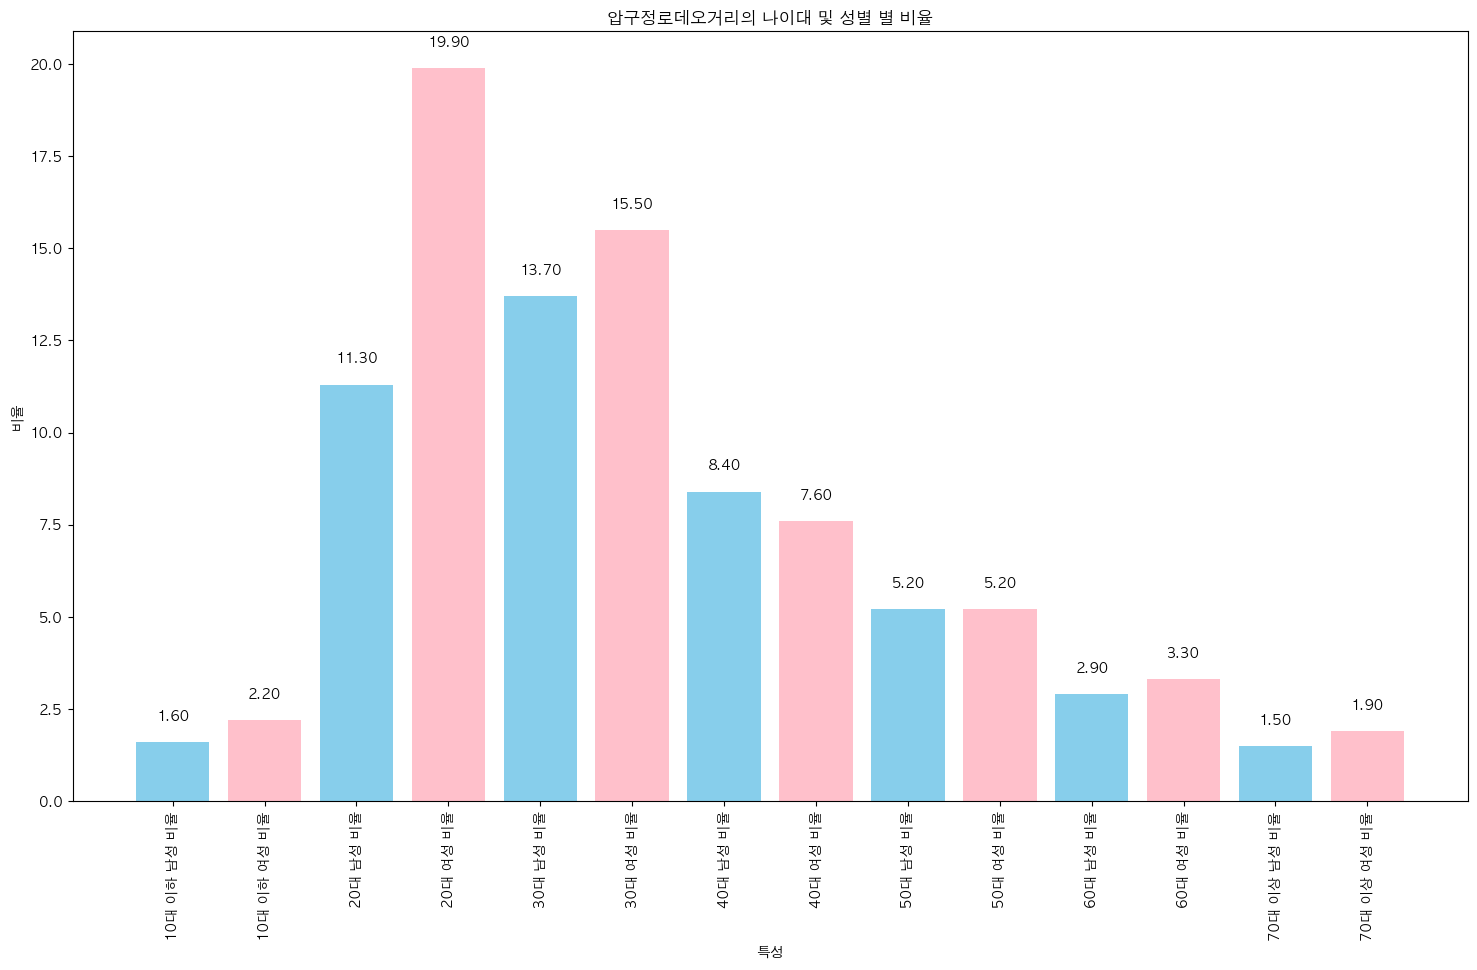

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_paths = ['강남구 관광지 성별.csv', '광진구 관광지 성별.csv', '성동구 관광지 성별.csv', '송파구 관광지 성별.csv']

dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    dfs.append(df)

# 데이터 프레임 병합
new_df = pd.concat(dfs, ignore_index=True)

# 사용자로부터 관광지명 입력받기
input_names = input("원하는 관광지명을 쉼표로 구분하여 입력하세요: ").split(',')

# 입력받은 관광지명 양쪽 공백 제거
input_names = [name.strip() for name in input_names]

# 입력받은 관광지명에 해당하는 데이터 필터링
filtered_df = new_df[new_df['관광지명(소재지역)'].isin(input_names)]

for name in input_names:
    if name in filtered_df['관광지명(소재지역)'].values:
        data = filtered_df[filtered_df['관광지명(소재지역)'] == name]
        data_melted = data.melt(id_vars=['관광지명(소재지역)', '대분류명', '중분류명'], var_name='특성', value_name='비율')
        
        plt.figure(figsize=(18, 10))
        
        # 막대 색상 설정
        colors = ['skyblue' if i % 2 == 0 else 'pink' for i in range(len(data_melted))]
        
        plt.bar(data_melted['특성'], data_melted['비율'], color=colors)
        
        for i, v in enumerate(data_melted['비율']):
            plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom')
        
        plt.title(f'{name}의 나이대 및 성별 별 비율')
        plt.xlabel('특성')
        plt.ylabel('비율')
        plt.xticks(rotation=90)
        plt.show()
